In [153]:
from IPython.display import display, HTML
from pandas import read_excel, concat, DataFrame
from numpy import split
from cartopy import crs
import matplotlib.pyplot as plt
import numpy as np


## Entrada de dados
Carga de planilha excel com os dados de sedimento de corrente do Vazante-Paracatu II
Saída de sumário da planilha antes das transformações


In [107]:
x_coord = "LongX"
y_coord = "LatY"
sample = "N.Lab."

survey_df, assay_df = split(
	read_excel("../data/Dados_Sedimentos_Vazante_Paracatu.xlsx").set_index([sample]), 
	[4], 
	axis=1
)

display("A planilha possui {} exemplares e {} variáveis".format(*assay_df.shape))

# Force int
survey_df[x_coord] = survey_df[x_coord].astype(int)
survey_df[y_coord] = survey_df[y_coord].astype(int)

'A planilha possui 3595 exemplares e 51 variáveis'

## Localização


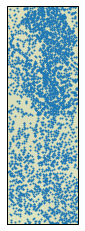

(233435, 341723, 7897972, 8229922)

In [108]:
proj = crs.UTM(23, True)

extent = (
	survey_df[x_coord].min(), survey_df[x_coord].max(),
	survey_df[y_coord].min(), survey_df[y_coord].max(),
)
 
ax = plt.axes(projection=proj)
ax.set_extent(extent, proj)
ax.stock_img()
plt.scatter(survey_df[x_coord], survey_df[y_coord], s=1)
plt.show()
display(extent)


## Testes de Variância amostral e analítica
Método de Thompson & Howarth (1978): Procurar referência
- Variancia amosstral: Identificar duplicatas de campo
- Variância analítica: Identificar replicatas


## Sumário estatístico - EDA
Exibe os primeiros sumários estatísticos dos dados antes de qualquer tipo de transformação.
Aqui são exibidos os seguintes parâmetros

1. Grau de detecção (>50%)
2. Log-Transformação
3. Teste de normalidade de Shapiro & Wilk (1965) para variáveis brutos e log-transformados 
com menos de 50% de grau de detecção. (Positivo para p>0,05)
(https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)

Saída 1: Tabela com sumário de estatístico contendo 
- Grau de detecção
- Média
- Mínimo, máximo
- Q1, Q2 (Mediana), Q3
- Q3 + 1.5 Amplitude Inter Quartil (Limiar superior)
- UCC (?)

Saída 2: Boxplot com os elementos válidos

Shapiro, S. S. & Wilk, M.B (1965). An analysis of variance test for normality (complete samples), Biometrika, Vol. 52, pp. 591-611.


In [154]:
assay_summary_df = DataFrame(index=assay_df.columns)

# Grau de Detecção
assay_summary_df["Válidos"] = assay_df.agg(
	lambda series: len([item for item in series if type(item) is int or type(item) is float])
)
assay_summary_df["Grau Detecção (%)"] = assay_summary_df["Válidos"].apply(
	lambda val: round((val / assay_df.shape[0]) * 100, 2)
)

assay_summary_df = concat([
 	assay_summary_df, assay_df.describe(include=[np.number]).T
], axis='columns', sort=True)
 
# # Calcular sumários estatísticos
# # Para obter os valores de quantis, serão criadas funções separadas
# def q25(df):
# 	return df.quantile(0.25)
#  
# def q75(df):
# 	return df.quantile(0.75)
#  
# assay_summary_df = concat([
# 	assay_summary_df, assay_df.agg(['mean', 'min', q25, 'median', q75, 'max']).T.applymap(lambda v: round(v, 2))
# ], axis='columns', sort=True)
# 
# # display(assay_df.applymap(lambda row: to_numeric(row, errors='ignore')).dtypes)
display(assay_summary_df)
display(assay_summary_df.dtypes)


ValueError: No objects to concatenate